## Importação do Dataset

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv ("teste_indicium_precificacao.csv")

## 1) Análise exploratória dos dados (EDA)

### Nessa primeira etapa basicamente organizei e limpei alguns dados como por exemplo coloquei a coluna ultima review para o tipo data e removi valores nulos das colunas price e reviews por mes 

In [6]:
df['ultima_review'] = pd.to_datetime(df['ultima_review'])

In [7]:
 df.dropna(subset=['price'], inplace=True)

In [8]:
df.dropna(subset=['reviews_por_mes'], inplace=True)

### Com este gráfico podemos chegar a conclusão de que os imóveis localizados em Manhattan tem a maior média de preço comparado aos outros 

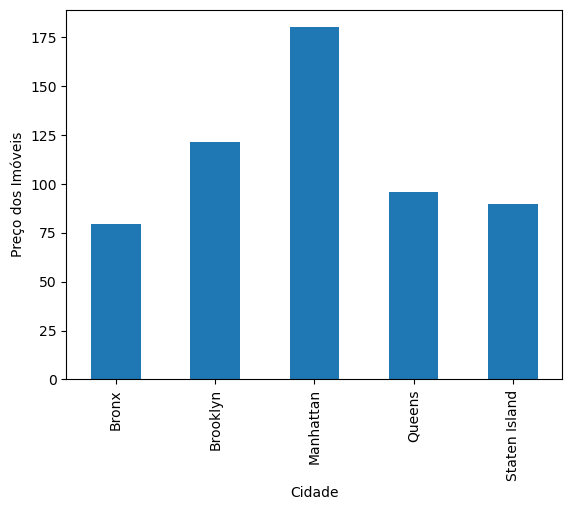

In [10]:
media_por_cidade = df.groupby('bairro_group')['price'].mean()
media_por_cidade
media_por_cidade.plot(kind='bar')
plt.xlabel("Cidade")
plt.ylabel("Preço dos Imóveis")
plt.show()

## 2 Respondendo as Seguintes Perguntas

### a) Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?


#### Como mostra a Análise abaixo o melhor local para comprar um apartamento seria em Manhattan, onde o preço médio é onde o preço médio é de $180.05 e a disponibilidade média é de 109.32 dias por ano.

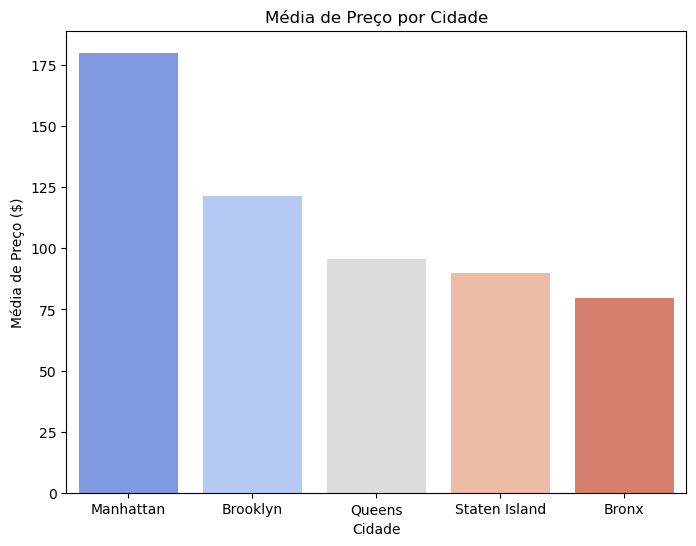

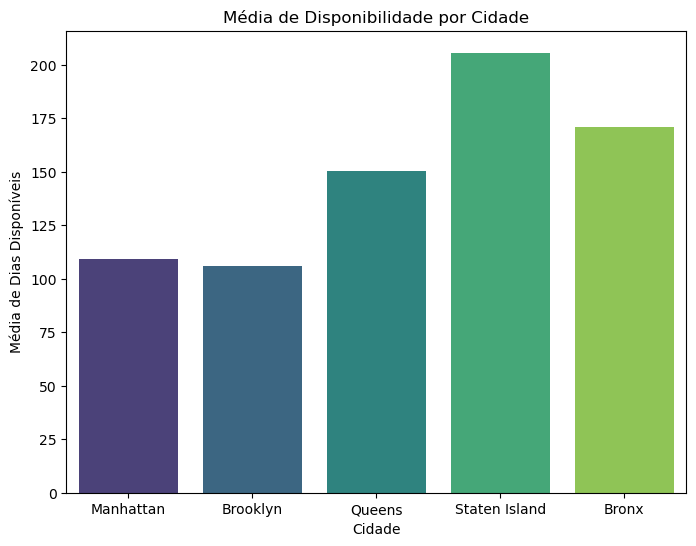

In [20]:
analise_investimento = df.groupby('bairro_group').agg(
    avg_price=('price', 'mean'),
    avg_availability=('disponibilidade_365', 'mean')
).sort_values(by='avg_price', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=analise_investimento.index, y=analise_investimento['avg_price'], palette='coolwarm', hue=analise_investimento.index, dodge=False)
plt.title('Média de Preço por Cidade')
plt.ylabel('Média de Preço ($)')
plt.xlabel('Cidade')
plt.legend([],[], frameon=False)
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x=analise_investimento.index, y=analise_investimento['avg_availability'], palette='viridis', hue=analise_investimento.index, dodge=False)
plt.title('Média de Disponibilidade por Cidade')
plt.ylabel('Média de Dias Disponíveis')
plt.xlabel('Cidade')
plt.legend([],[], frameon=False)
plt.show()

melhor_localizacao = analise_investimento.loc[analise_investimento['avg_price'].idxmax()]

### b) O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?


#### Sim. Como mostra a Análise abaixo, obviamente o maior número minimo de noites(90 +) é a média de preço mais alta, porém como observado no primeiro gráfico imóveis com o número minimo de noites de 0-3 tendem a ter o preço médio mais elevado do que os de 8-14 noites por exemplo. E Imóveis com disponibilidade Média entre 181-270 dias apresentam preço médio mais elevado comparado aos outros.


Preço Médio por minimo de noites:
minimo_noites_group
0-3      138.230912
4-7      152.951684
8-14     129.146509
15-30    149.252412
31-90    158.920118
90+      336.980198
Name: price, dtype: float64


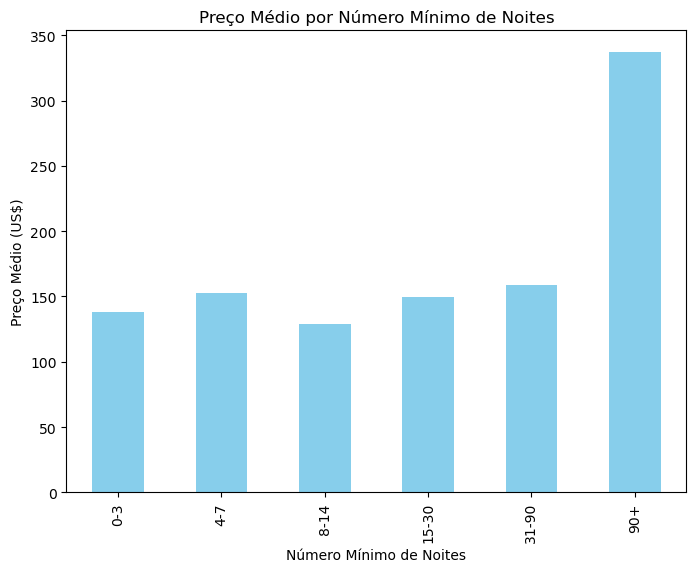


Preço Médio por Faixa de Disponibilidade:
disponibilidade_group
0-90       134.742278
91-180     150.250386
181-270    163.588191
271-365    162.244993
Name: price, dtype: float64


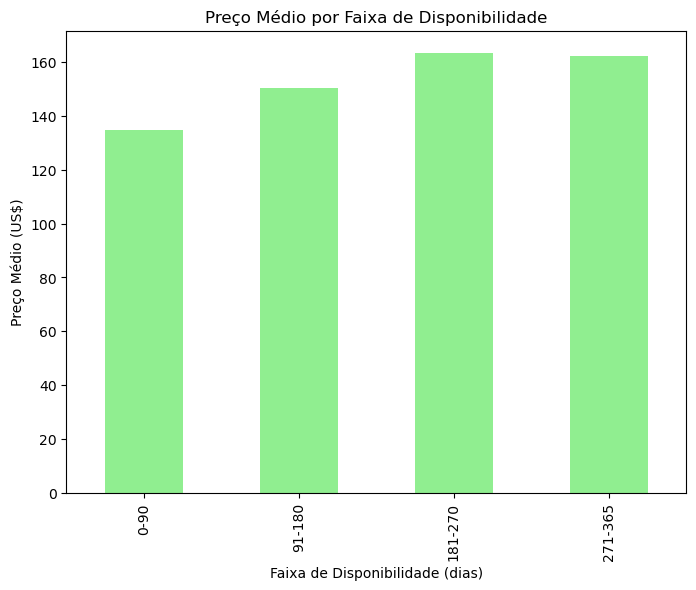

In [24]:
#1 Agrupei por minimo de noites e calculei o  preço médio
df['minimo_noites_group'] = pd.cut(df['minimo_noites'], bins=[0, 3, 7, 14, 30, 90, np.inf], labels=['0-3', '4-7', '8-14', '15-30', '31-90', '90+'])
grouped_by_minimo_noites = df.groupby('minimo_noites_group', observed=True)['price'].mean()
print("\nPreço Médio por minimo de noites:")
print(grouped_by_minimo_noites)

plt.figure(figsize=(8, 6))
grouped_by_minimo_noites.plot(kind='bar', color='skyblue')
plt.title('Preço Médio por Número Mínimo de Noites')
plt.xlabel('Número Mínimo de Noites')
plt.ylabel('Preço Médio (US$)')
plt.show()

#2. Agrupei por dias disponiveis e calculei o preço médio
df['disponibilidade_group'] = pd.cut(df['disponibilidade_365'], bins=[0, 90, 180, 270, 365], labels=['0-90', '91-180', '181-270', '271-365'])
grouped_by_disponibilidade = df.groupby('disponibilidade_group', observed=True)['price'].mean()
print("\nPreço Médio por Faixa de Disponibilidade:")
print(grouped_by_disponibilidade)

plt.figure(figsize=(8, 6))
grouped_by_disponibilidade.plot(kind='bar', color='lightgreen')
plt.title('Preço Médio por Faixa de Disponibilidade')
plt.xlabel('Faixa de Disponibilidade (dias)')
plt.ylabel('Preço Médio (US$)')
plt.show()

### c) Existe algum padrão no texto do nome do local para lugares de mais alto valor?

#### Observe na Nuvem de Palavras Abaixo

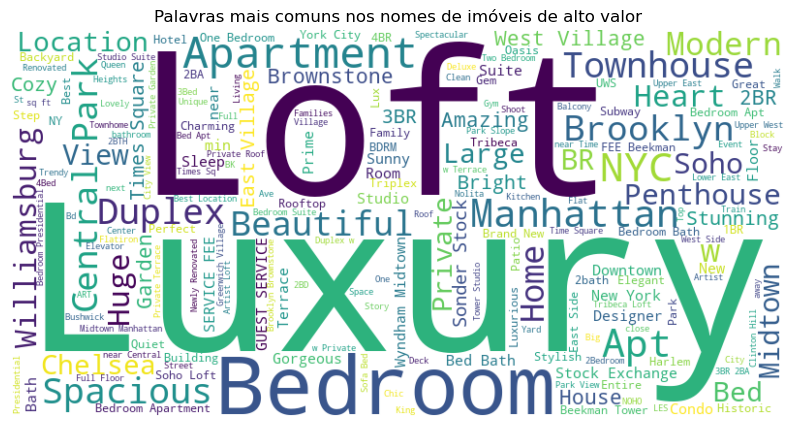

In [28]:
# Biblioteca para gerar nuvens de palavras
from wordcloud import WordCloud

# Calculei 95 percentil do preço para identificar os imóveis mais caros.
#Imóveis com preço acima desse limite foram filtrados no df
acima_do_limite = df['price'].quantile(0.95)
imoveis_caros = df[df['price'] > acima_do_limite]

# Concatenei todos os nomes em um unico texto e removi valores faltantes
textos_caros = " ".join(imoveis_caros['nome'].dropna())

nuvem = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(textos_caros)

# Exibir a nuvem de palavras
plt.figure(figsize=(10, 6))
plt.imshow(nuvem, interpolation='bilinear')
plt.axis('off')
plt.title('Palavras mais comuns nos nomes de imóveis de alto valor')
plt.show()

## 3 Explique como você faria a previsão do preço a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

#### 1) A previsão do preço foi realizada utilizando um modelo de regressão linear. 2) Utilizei as Variáveis de disponibilidade ao longo do ano pois achei que ajudaria a compreender a influencia de oferta em relação ao preço, minimo noites e reviews por mes entre outras pois impactam diretamente no valor do Imóvel e já estava visando responder a questao 4. Não Utilizei nenhum tipo de transformação nos dados. 3) Esse é um problema de regressão pois o objetivo é previsão de algo no caso o valor.   4)Utilizei Regressão Linear Simples pois é fácil de entender e implementar e funciona bem em conjuntos de dados médios/grandes. Os contras são: assume que a relação entre as variáveis independentes e o preço é linear, o que pode não ser realista em todos os casos. 5) AE (Mean Absolute Error): Indica o erro médio absoluto, fácil de interpretar e robusto a outliers. Seus Contras sao: Assume que existe uma relação linear entre as variáveis independentes e a variável dependente. Se essa relação for não linear, o modelo pode não se ajustar bem aos dados.Sensibilidade a outliers: Outliers podem ter um grande impacto nos coeficientes da regressão linear, pois a linha de melhor ajuste tenta minimizar a distância a todos os pontos, incluindo os outliers.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer

# Selecionei variáveis releantes relevantes para a previsão de preço já visando a quesão 4 
variaveis = ['bairro_group', 'bairro', 'room_type', 'minimo_noites', 'numero_de_reviews',
    'reviews_por_mes', 'calculado_host_listings_count', 'disponibilidade_365']

# Preparar os dados: converter variáveis categóricas em variaveis indicadoras 
df_prepared = pd.get_dummies(df[variaveis + ['price']], drop_first=True)

# Separar variáveis independentes (X) e dependente (y)
X = df_prepared.drop('price', axis=1)
y = df_prepared['price']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo com o erro médio absoluto (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Fazer previsão para o imovel da questao 4 
previsao_apartamento = {'bairro_group': 'Manhatan',
    'bairro': 'Midtown',
    'room_type': 'Entire home/apt',
    'minimo_noites': 1,
    'numero_de_reviews': 45,
    'reviews_por_mes': 0.38,
    'calculado_host_listings_count': 2,
    'disponibilidade_365': 355 }

# Transformar os dados do novo apartamento para o formato do modelo
previsao_apartamento_df = pd.DataFrame([previsao_apartamento])
valor_apartamento = pd.get_dummies(previsao_apartamento_df, drop_first=True)
valor_apartamento = valor_apartamento.reindex(columns=X.columns, fill_value=0)

# Fazer a previsão
predicted_price = model.predict(valor_apartamento)
print(f'Preço previsto para o novo apartamento: ${predicted_price[0]:.2f}')
print(f'Erro Médio Absoluto (MAE): {mae}')

Preço previsto para o novo apartamento: $176.94
Erro Médio Absoluto (MAE): 60701.55791166895


## 4 - Supondo um apartamento com as seguintes características:

###{'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355}


### De Acordo com o modelo de previsão da questão 3 O Preço previsto para o novo apartamento é de: $176.94

## Salvando o model em PKL

In [38]:
import pickle

# Salvar o modelo treinado
with open('modelo_preco.pkl', 'wb') as file:
    pickle.dump(model, file)

In [1]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
